<a href="https://colab.research.google.com/github/electrolabopen/archivoscsv/blob/master/regresionlinealmultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df= pd.read_csv('/content/drive/My Drive/MultipleLinear.csv')
print(df)
print(df.columns)

        y  x1    x2
0   16.68   7   560
1   11.50   3   220
2   12.03   3   340
3   14.88   4    80
4   13.75   6   150
5   18.11   7   330
6    8.00   2   110
7   17.83   7   210
8   79.24  30  1460
9   21.50   5   605
10  40.33  16   688
11  21.00  10   215
12  13.50   4   255
13  19.75   6   462
14  24.00   9   448
15  29.00  10   776
16  15.35   6   200
17  19.00   7   132
18   9.50   3    36
19  35.10  17   770
20  17.90  10   140
21  52.32  26   810
22  18.75   9   450
23  19.83   8   635
24  10.75   4   150
Index(['y', 'x1', 'x2'], dtype='object')


In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [37]:
#convertir en un arreglo
dataset= df.values

In [38]:
#para ver como quedaron primera columna y la siguiente x1 y la otra x2
print(dataset)

[[  16.68    7.    560.  ]
 [  11.5     3.    220.  ]
 [  12.03    3.    340.  ]
 [  14.88    4.     80.  ]
 [  13.75    6.    150.  ]
 [  18.11    7.    330.  ]
 [   8.      2.    110.  ]
 [  17.83    7.    210.  ]
 [  79.24   30.   1460.  ]
 [  21.5     5.    605.  ]
 [  40.33   16.    688.  ]
 [  21.     10.    215.  ]
 [  13.5     4.    255.  ]
 [  19.75    6.    462.  ]
 [  24.      9.    448.  ]
 [  29.     10.    776.  ]
 [  15.35    6.    200.  ]
 [  19.      7.    132.  ]
 [   9.5     3.     36.  ]
 [  35.1    17.    770.  ]
 [  17.9    10.    140.  ]
 [  52.32   26.    810.  ]
 [  18.75    9.    450.  ]
 [  19.83    8.    635.  ]
 [  10.75    4.    150.  ]]


In [39]:
# x:caracteristicas (x1,x2) y variable a predecir
X=dataset[:,1:3]
Y=dataset[:,0]

In [40]:
#veo el valor de Y
print(Y)

[16.68 11.5  12.03 14.88 13.75 18.11  8.   17.83 79.24 21.5  40.33 21.
 13.5  19.75 24.   29.   15.35 19.    9.5  35.1  17.9  52.32 18.75 19.83
 10.75]


In [41]:
print(X)

[[   7.  560.]
 [   3.  220.]
 [   3.  340.]
 [   4.   80.]
 [   6.  150.]
 [   7.  330.]
 [   2.  110.]
 [   7.  210.]
 [  30. 1460.]
 [   5.  605.]
 [  16.  688.]
 [  10.  215.]
 [   4.  255.]
 [   6.  462.]
 [   9.  448.]
 [  10.  776.]
 [   6.  200.]
 [   7.  132.]
 [   3.   36.]
 [  17.  770.]
 [  10.  140.]
 [  26.  810.]
 [   9.  450.]
 [   8.  635.]
 [   4.  150.]]


In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.2.0


In [43]:
#Contruimos el modelo con una funcion.
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[2]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [44]:
#Llamamos al modelo
model = build_model()

In [45]:
#Epocas
model.fit(X,Y,epochs=10,verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 7815.2988 - mae: 71.3690 - mse: 7815.2988
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 2215.5730 - mae: 38.5278 - mse: 2215.5730
Epoch 3/10
1/1 [==============================] - 0s 942us/step - loss: 741.9085 - mae: 22.5209 - mse: 741.9085
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 283.2943 - mae: 13.7383 - mse: 283.2943
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 126.5549 - mae: 8.7846 - mse: 126.5549
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 76.2755 - mae: 7.1349 - mse: 76.2755
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 61.7754 - mae: 6.6767 - mse: 61.7754
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 58.0147 - mae: 6.5845 - mse: 58.0147
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 57.1338 - mae: 6.5379 - mse: 57.1338
Epoch 10/10
1/1 [

In [13]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-dank15pv
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-dank15pv
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.02f0f9b2afcea4c45f19f7089f87d9d8b6f7f833a_-cp36-none-any.whl size=124710 sha256=0258976412b1e4b89fa84945abf353cde1ab9a6bb44329b7e6ba98cb9cde26ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-m6jw3i_6/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [46]:
#importamos el modulo de tensorfloe docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [47]:
EPOCHS = 1000
history = model.fit(
    X,Y,
    epochs= EPOCHS, verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:56.8777,  mae:6.5049,  mse:56.8777,  
....................................................................................................
Epoch: 100, loss:92.6418,  mae:7.7545,  mse:92.6418,  
....................................................................................................
Epoch: 200, loss:73.7427,  mae:6.9268,  mse:73.7427,  
....................................................................................................
Epoch: 300, loss:64.3625,  mae:6.4130,  mse:64.3625,  
....................................................................................................
Epoch: 400, loss:56.1047,  mae:5.9333,  mse:56.1047,  
....................................................................................................
Epoch: 500, loss:48.1246,  mae:5.4597,  mse:48.1246,  
....................................................................................................
Epoch: 600, loss:40.2571,  mae:4.8911,  mse:40.2571,  
..........

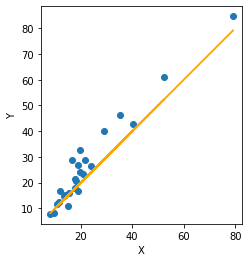

In [35]:
#Graficar los valores reales vs la prediccion
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect='equal')
plt.scatter(Y, test_predictions)
plt.xlabel('X')
plt.ylabel('Y')
_=plt.plot(Y,Y,color='orange')

In [36]:
import numpy as np
model.predict(np.array([[2,110]]))

array([[7.8275805]], dtype=float32)